Họ và tên: Phạm Đức Thể

MSSV: 19522253

Lớp: DS201.M11.2

Buổi 01 - 29/09/2021

#LAB 01 - XÂY DỰNG MẠNG NEURAL ĐƠN GIẢN

## Import các thư viện cần thiết

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sn


from keras.datasets.mnist import load_data
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers
from keras.layers import Dense, Activation
from keras.models import Sequential
from sklearn.metrics import accuracy_score, confusion_matrix
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from keras.models import load_model

## Load bộ dữ liệu

In [ ]:
(X_train, y_train), (X_test, y_test) = load_data()

11501568/11490434 [==============================] - 0s 0us/step


## Chuẩn bị dữ liệu

In [ ]:
print('X_train = {}'.format(X_train.shape))
print('y_train = {}'.format(y_train.shape))
print('X_test = {}'.format(X_test.shape))
print('y_test = {}'.format(y_test.shape))

X_train = (60000, 28, 28)
y_train = (60000,)
X_test = (10000, 28, 28)
y_test = (10000,)


In [ ]:
X_train_reshaped = X_train.reshape(-1, 28*28)
X_test_reshaped = X_test.reshape(-1, 28*28)

In [ ]:
y_train = to_categorical(y_train, num_classes = 10)

In [ ]:
print('X_train_reshaped = {}'.format(X_train_reshaped.shape))
print('y_train = {}'.format(y_train.shape))
print('X_test_reshaped = {}'.format(X_test_reshaped.shape))
print('y_test = {}'.format(y_test.shape))

X_train_reshaped = (60000, 784)
y_train = (60000, 10)
X_test_reshaped = (10000, 784)
y_test = (10000,)


## Xây dựng mạng neural bằng keras

In [ ]:
# Khởi tạo model
model = Sequential()

model.add(Dense(784, input_shape=(784, )))
model.add(Dense(10, input_shape=(10, )))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 784)               615440    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                7850      
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________


## Huấn luyện model

In [ ]:
# Compile model
optimizer = Adam(learning_rate=0.01)
loss = BinaryCrossentropy()
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [ ]:
# Training model
model.fit(X_train_reshaped, y_train, batch_size=128, 
          epochs=10, validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 5s 4ms/step - loss: 1.7562 - accuracy: 0.1093 - val_loss: 1.5426 - val_accuracy: 0.0994
Epoch 2/10
375/375 [==============================] - 2s 4ms/step - loss: 1.5425 - accuracy: 0.0993 - val_loss: 1.5426 - val_accuracy: 0.0994
Epoch 3/10
375/375 [==============================] - 1s 4ms/step - loss: 1.5425 - accuracy: 0.0993 - val_loss: 1.5426 - val_accuracy: 0.0994
Epoch 4/10
375/375 [==============================] - 2s 4ms/step - loss: 1.5425 - accuracy: 0.0993 - val_loss: 1.5426 - val_accuracy: 0.0994
Epoch 5/10
375/375 [==============================] - 1s 4ms/step - loss: 1.5425 - accuracy: 0.0993 - val_loss: 1.5426 - val_accuracy: 0.0994
Epoch 6/10
375/375 [==============================] - 2s 4ms/step - loss: 1.5425 - accuracy: 0.0993 - val_loss: 1.5426 - val_accuracy: 0.0994
Epoch 7/10
375/375 [==============================] - 1s 4ms/step - loss: 1.5425 - accuracy: 0.0993 - val_loss: 1.5426 - val_accuracy: 0.0994
Epoch 

## Đánh giá mô hình

In [ ]:
y_pred = model.predict(X_test_reshaped)
y_pred = np.argmax(y_pred, axis = -1)
accuracy = round(accuracy_score(y_test, y_pred)*100,2)
print('Accuracy test = {}%'.format(accuracy))

Accuracy test = 9.95%


## Lưu mô hình

In [ ]:
# Lưu model qua drive
model.save('/content/drive/MyDrive/my_model.h5')

In [ ]:
# Load model lên 
model = load_model('/content/drive/MyDrive/my_model.h5')

#Bài 01

## Xây dựng mạng neural bằng keras

In [ ]:
# Khởi tạo model
model_1 = Sequential()

model_1.add(Dense(784, input_shape=(784, ), activation='sigmoid'))
model_1.add(Dense(10, input_shape=(10, ), activation='sigmoid'))

In [ ]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 784)               615440    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                7850      
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________


## Huấn luyện model

In [ ]:
# Compile model
optimizer = Adam(learning_rate=0.01)
loss = BinaryCrossentropy()
model_1.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [ ]:
# Training model
model_1.fit(X_train_reshaped, y_train, batch_size=128, 
            epochs=20, validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 2s 4ms/step - loss: 0.1398 - accuracy: 0.7761 - val_loss: 0.1027 - val_accuracy: 0.8367
Epoch 2/20
375/375 [==============================] - 1s 4ms/step - loss: 0.1092 - accuracy: 0.8208 - val_loss: 0.1143 - val_accuracy: 0.8064
Epoch 3/20
375/375 [==============================] - 2s 4ms/step - loss: 0.1084 - accuracy: 0.8218 - val_loss: 0.0918 - val_accuracy: 0.8599
Epoch 4/20
375/375 [==============================] - 1s 4ms/step - loss: 0.1004 - accuracy: 0.8362 - val_loss: 0.0917 - val_accuracy: 0.8585
Epoch 5/20
375/375 [==============================] - 1s 4ms/step - loss: 0.0945 - accuracy: 0.8443 - val_loss: 0.0890 - val_accuracy: 0.8582
Epoch 6/20
375/375 [==============================] - 1s 4ms/step - loss: 0.0906 - accuracy: 0.8540 - val_loss: 0.0869 - val_accuracy: 0.8687
Epoch 7/20
375/375 [==============================] - 1s 4ms/step - loss: 0.0897 - accuracy: 0.8556 - val_loss: 0.0785 - val_accuracy: 0.8784
Epoch 

## Đánh giá mô hình

In [ ]:
y_pred_1 = model_1.predict(X_test_reshaped)
y_pred_1 = np.argmax(y_pred_1, axis = -1)
accuracy_1 = round(accuracy_score(y_test, y_pred_1)*100,2)
print('Accuracy test = {}%'.format(accuracy_1))

Accuracy test = 88.62%


# Bài 02

## Xây dựng mạng neural bằng keras

In [ ]:
# Khởi tạo model
model_2 = Sequential()

model_2.add(Dense(784, input_shape=(784, ), activation='relu'))
model_2.add(Dense(10, input_shape=(10, ), activation='sigmoid'))

In [ ]:
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 784)               615440    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                7850      
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________


## Huấn luyện model

In [ ]:
# Compile model
optimizer = Adam(learning_rate=0.01)
loss = BinaryCrossentropy()
model_2.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [ ]:
# Training model
model_2.fit(X_train_reshaped, y_train, batch_size=128, 
            epochs=20, validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 2s 4ms/step - loss: 4.0756 - accuracy: 0.8569 - val_loss: 0.0624 - val_accuracy: 0.9244
Epoch 2/20
375/375 [==============================] - 1s 4ms/step - loss: 0.0548 - accuracy: 0.9282 - val_loss: 0.0531 - val_accuracy: 0.9323
Epoch 3/20
375/375 [==============================] - 2s 4ms/step - loss: 0.0435 - accuracy: 0.9397 - val_loss: 0.0478 - val_accuracy: 0.9373
Epoch 4/20
375/375 [==============================] - 1s 4ms/step - loss: 0.0382 - accuracy: 0.9472 - val_loss: 0.0474 - val_accuracy: 0.9405
Epoch 5/20
375/375 [==============================] - 1s 4ms/step - loss: 0.0370 - accuracy: 0.9491 - val_loss: 0.0447 - val_accuracy: 0.9415
Epoch 6/20
375/375 [==============================] - 1s 4ms/step - loss: 0.0385 - accuracy: 0.9472 - val_loss: 0.0479 - val_accuracy: 0.9397
Epoch 7/20
375/375 [==============================] - 1s 4ms/step - loss: 0.0389 - accuracy: 0.9461 - val_loss: 0.0547 - val_accuracy: 0.9333
Epoch 

## Đánh giá mô hình

In [ ]:
y_pred_2 = model_2.predict(X_test_reshaped)
y_pred_2 = np.argmax(y_pred_2, axis = -1)
accuracy_2 = round(accuracy_score(y_test, y_pred_2)*100,2)
print('Accuracy test = {}%'.format(accuracy_2))

Accuracy test = 74.68%


# Bài 03

## Chuẩn bị dữ liệu

In [ ]:
print('X_train = {}'.format(X_train.shape))
print('y_train = {}'.format(y_train.shape))
print('X_test = {}'.format(X_test.shape))
print('y_test = {}'.format(y_test.shape))

X_train = (60000, 28, 28)
y_train = (60000, 10)
X_test = (10000, 28, 28)
y_test = (10000,)


In [ ]:
# Data normalization
X_train_new = X_train/255.0 
X_test_new = X_test/255.0 

In [ ]:
X_train_new_reshaped = X_train_new.reshape(-1, 28*28)
X_test_new_reshaped = X_test_new.reshape(-1, 28*28)

In [ ]:
print('X_train_new_reshaped = {}'.format(X_train_new_reshaped.shape))
print('y_train = {}'.format(y_train.shape))
print('X_test_new_reshaped = {}'.format(X_test_new_reshaped.shape))
print('y_test = {}'.format(y_test.shape))

X_train_new_reshaped = (60000, 784)
y_train = (60000, 10)
X_test_new_reshaped = (10000, 784)
y_test = (10000,)


## Xây dựng mạng neural bằng keras

In [ ]:
# Khởi tạo model
model_3 = Sequential()

model_3.add(Dense(784, input_shape=(784, ), activation='relu'))
model_3.add(Dense(10, input_shape=(10, ), activation='sigmoid'))

In [ ]:
model_3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 784)               615440    
_________________________________________________________________
dense_7 (Dense)              (None, 10)                7850      
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________


## Huấn luyện model

In [ ]:
# Compile model
optimizer = Adam(learning_rate=0.01)
loss = BinaryCrossentropy()
model_3.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [ ]:
# Training model
model_3.fit(X_train_new_reshaped, y_train, batch_size=128, 
            epochs=20, validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0461 - accuracy: 0.9313 - val_loss: 0.0258 - val_accuracy: 0.9622
Epoch 2/20
375/375 [==============================] - 2s 4ms/step - loss: 0.0201 - accuracy: 0.9729 - val_loss: 0.0213 - val_accuracy: 0.9698
Epoch 3/20
375/375 [==============================] - 2s 4ms/step - loss: 0.0153 - accuracy: 0.9808 - val_loss: 0.0231 - val_accuracy: 0.9689
Epoch 4/20
375/375 [==============================] - 1s 4ms/step - loss: 0.0134 - accuracy: 0.9830 - val_loss: 0.0246 - val_accuracy: 0.9722
Epoch 5/20
375/375 [==============================] - 1s 4ms/step - loss: 0.0113 - accuracy: 0.9866 - val_loss: 0.0226 - val_accuracy: 0.9756
Epoch 6/20
375/375 [==============================] - 1s 4ms/step - loss: 0.0096 - accuracy: 0.9898 - val_loss: 0.0252 - val_accuracy: 0.9743
Epoch 7/20
375/375 [==============================] - 1s 4ms/step - loss: 0.0084 - accuracy: 0.9912 - val_loss: 0.0262 - val_accuracy: 0.9754
Epoch 

## Đánh giá mô hình

In [ ]:
y_pred_3 = model_3.predict(X_test_new_reshaped)
y_pred_3 = np.argmax(y_pred_3, axis = -1)
accuracy_3 = round(accuracy_score(y_test, y_pred_3)*100,2)
print('Accuracy test = {}%'.format(accuracy_3))

Accuracy test = 97.79%


# Bài 04

## Ma trận nhầm lẫn của bài 3

In [ ]:
cm = confusion_matrix(y_test, y_pred_3)

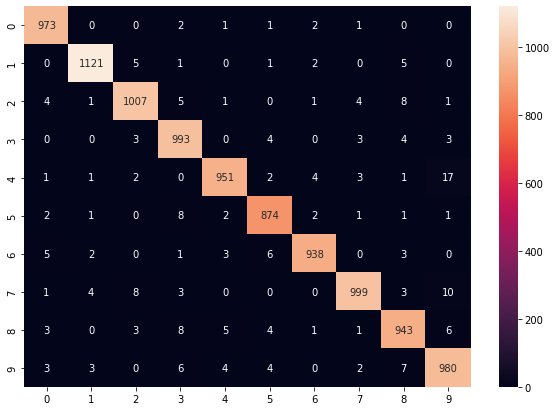

In [ ]:
df_cm = pd.DataFrame(cm, index = [i for i in range(0,10)], 
                     columns = [i for i in range(0,10)]) 

plt.figure(figsize = (10,7)) 
sn.heatmap(df_cm, annot=True, fmt='.5g')

# Bài 05

## Import các thư viện cần thiết

In [ ]:
from keras.datasets.cifar10 import load_data 

## Load bộ dữ liệu

In [ ]:
(X_train_5, y_train_5), (X_test_5, y_test_5) = load_data()

170508288/170498071 [==============================] - 6s 0us/step


## Chuẩn bị dữ liệu

In [ ]:
print('X_train_5 = {}'.format(X_train_5.shape))
print('y_train_5 = {}'.format(y_train_5.shape))
print('X_test_5 = {}'.format(X_test_5.shape))
print('y_test_5 = {}'.format(y_test_5.shape))

X_train_5 = (50000, 32, 32, 3)
y_train_5 = (50000, 1)
X_test_5 = (10000, 32, 32, 3)
y_test_5 = (10000, 1)


In [ ]:
X_train_5_new = X_train_5/255.0 
X_test_5_new = X_test_5/255.0 

In [ ]:
X_train_5_reshaped = X_train_5_new.reshape(-1, 32*32*3)
X_test_5_reshaped = X_test_5_new.reshape(-1, 32*32*3)

In [ ]:
y_train_5 = to_categorical(y_train_5, num_classes = 10)

In [ ]:
print('X_train_5_reshaped = {}'.format(X_train_5_reshaped.shape))
print('y_train_5 = {}'.format(y_train_5.shape))
print('X_test_5_reshaped = {}'.format(X_test_5_reshaped.shape))
print('y_test_5 = {}'.format(y_test_5.shape))

X_train_5_reshaped = (50000, 3072)
y_train_5 = (50000, 10)
X_test_5_reshaped = (10000, 3072)
y_test_5 = (10000, 1)


## Xây dựng mạng neural bằng keras

In [ ]:
# Khởi tạo model
model_5 = Sequential()

model_5.add(Dense(3072, input_shape=(3072, ), activation='relu'))
model_5.add(Dense(512, input_shape=(512, ), activation='relu'))
model_5.add(Dense(10, input_shape=(10, ), activation='sigmoid'))

In [ ]:
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 3072)              9440256   
_________________________________________________________________
dense_9 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_10 (Dense)             (None, 10)                5130      
Total params: 11,018,762
Trainable params: 11,018,762
Non-trainable params: 0
_________________________________________________________________


## Huấn luyện model

In [ ]:
# Compile model
optimizer = Adam(learning_rate=0.0001)
loss = BinaryCrossentropy()
model_5.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [ ]:
# Training model
history = model_5.fit(X_train_5_reshaped, y_train_5, batch_size=128, 
                      epochs=30, validation_split=0.2)

Epoch 1/30
313/313 [==============================] - 4s 12ms/step - loss: 0.2858 - accuracy: 0.3293 - val_loss: 0.2661 - val_accuracy: 0.3876
Epoch 2/30
313/313 [==============================] - 3s 11ms/step - loss: 0.2563 - accuracy: 0.4103 - val_loss: 0.2554 - val_accuracy: 0.4195
Epoch 3/30
313/313 [==============================] - 3s 11ms/step - loss: 0.2442 - accuracy: 0.4437 - val_loss: 0.2446 - val_accuracy: 0.4489
Epoch 4/30
313/313 [==============================] - 3s 11ms/step - loss: 0.2365 - accuracy: 0.4675 - val_loss: 0.2442 - val_accuracy: 0.4372
Epoch 5/30
313/313 [==============================] - 3s 11ms/step - loss: 0.2296 - accuracy: 0.4828 - val_loss: 0.2336 - val_accuracy: 0.4714
Epoch 6/30
313/313 [==============================] - 3s 11ms/step - loss: 0.2247 - accuracy: 0.4983 - val_loss: 0.2339 - val_accuracy: 0.4711
Epoch 7/30
313/313 [==============================] - 3s 11ms/step - loss: 0.2191 - accuracy: 0.5121 - val_loss: 0.2347 - val_accuracy: 0.4606

## Đánh giá mô hình

### Accuracy

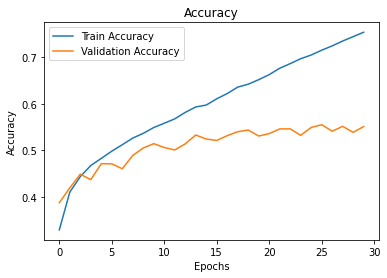

In [ ]:
plt.figure(0)
plt.plot(history.history['accuracy'], label = 'Train Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Loss

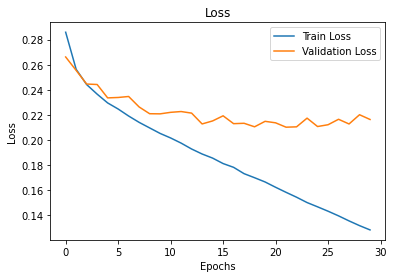

In [ ]:
plt.figure(0)
plt.plot(history.history['loss'], label = 'Train Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
y_pred_5 = model_5.predict(X_test_5_reshaped)
y_pred_5 = np.argmax(y_pred_5, axis = -1)
accuracy_5 = round(accuracy_score(y_test_5, y_pred_5)*100,2)
print('Accuracy test = {}%'.format(accuracy_5))

Accuracy test = 55.1%


## Ma trận nhầm lẫn

In [ ]:
cm_5 = confusion_matrix(y_test_5, y_pred_5)

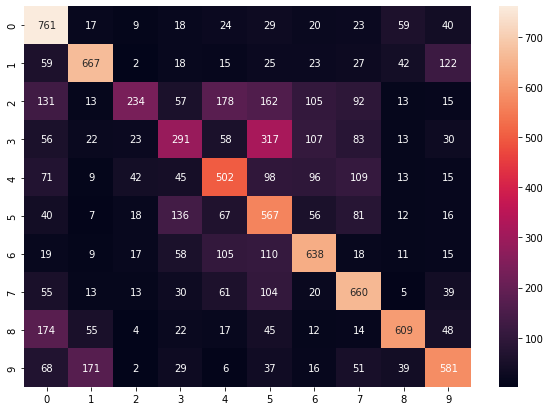

In [ ]:
df_cm_5 = pd.DataFrame(cm_5, index = [i for i in range(0,10)], 
                       columns = [i for i in range(0,10)]) 

plt.figure(figsize = (10,7)) 
sn.heatmap(df_cm_5, annot=True, fmt='.5g')

## Lưu mô hình

In [ ]:
# Lưu model qua drive
model_5.save('/content/drive/MyDrive/my_model_5.h5')

In [ ]:
# Load model lên 
model_5 = load_model('/content/drive/MyDrive/my_model_5.h5')